<a href="https://colab.research.google.com/github/ktakano/lecture/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI演習 第7回
### ディープラーニングによる自然言語処理 (2)

### RNN (Recurrent Neural Network)

*   再帰型のニューラルネットワークです。
*   自然後処理などの分野で利用されます。
 * 文書分類、感情分析、機械翻訳、文章生成
* LSTM (Long short-term memory) や GRU (Gated recurrent units) などの応用モデルがあります。
<br>
<img src='https://drive.google.com/uc?export=view&id=1yPrN0u3icVHxT_OykvU4QqYgjcBUdRFj' width='70%'>




### RNNによる文書分類
* 前回の1次元CNNの例題と同じように、IMDBデータセットを用いて、レビューのポジ・ネガ分類をします。

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_words = 10000  # 単語数
max_len = 500  # 入力する単語列の長さ
embedding_dim = 128 # 単語埋め込み層の次元

print('データのロード中...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
print(len(x_train), 'train 列 (sequence)')
print(len(x_test), 'test 列 (sequence)')

# パディング処理
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

データのロード中...
25000 train 列 (sequence)
25000 test 列 (sequence)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


### RNNモデルの構築
* SimpleRNNを用いてRNNモデルを構築します。

In [9]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential

embedding_dim=128
model_rnn=Sequential()
model_rnn.add(Embedding(max_words, embedding_dim, input_length=max_len))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(1, activation='sigmoid'))
print(model_rnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               22900     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 1,303,001
Trainable params: 1,303,001
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model_rnn.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['acc'])

batch_size = 128
num_epochs = 5

history = model_rnn.fit(x_train, y_train, 
              validation_split=0.2, 
              batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
157/157 [==============================] - 66s 418ms/step - loss: 0.1499 - acc: 0.9355 - val_loss: 0.6964 - val_acc: 0.6376
Epoch 2/5
157/157 [==============================] - 66s 422ms/step - loss: 0.3322 - acc: 0.8515 - val_loss: 0.6049 - val_acc: 0.6750
Epoch 3/5
157/157 [==============================] - 67s 424ms/step - loss: 0.2652 - acc: 0.8942 - val_loss: 0.5194 - val_acc: 0.8232
Epoch 4/5
157/157 [==============================] - 66s 423ms/step - loss: 0.0507 - acc: 0.9822 - val_loss: 0.6341 - val_acc: 0.7972
Epoch 5/5
157/157 [==============================] - 67s 424ms/step - loss: 0.0177 - acc: 0.9951 - val_loss: 0.6791 - val_acc: 0.8044


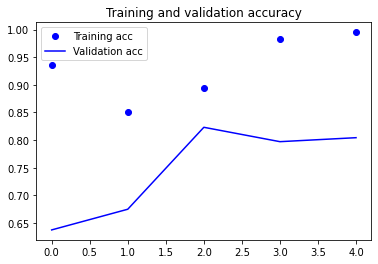

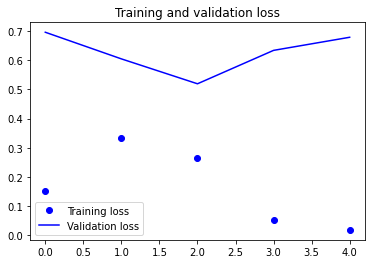

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
scores = model_rnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.7974799871444702


### LSTM (Long short-term memory )
* RNNの一種のニューラルネットワークです。
* RNNでは、学習時に勾配消失が起きるため、うまく学習できないという問題があります。
* LSTMでは、次のLSTMレイヤへ記憶を伝達するための記憶セルを別途設けることで、学習時の勾配消失の問題を防ぎます。

### LSTMモデルの構築
* LSTMを用いてモデルを構築します。

In [18]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim=128
model_lstm=Sequential()
model_lstm.add(Embedding(max_words, embedding_dim, input_length=max_len))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1, activation='sigmoid'))
print(model_lstm.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,371,701
Trainable params: 1,371,701
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model_lstm.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['acc'])

batch_size = 128
num_epochs = 5

history = model_lstm.fit(x_train, y_train, 
              validation_split=0.2, 
              batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
157/157 [==============================] - 231s 1s/step - loss: 0.5352 - acc: 0.7308 - val_loss: 0.3781 - val_acc: 0.8352
Epoch 2/5
157/157 [==============================] - 228s 1s/step - loss: 0.3049 - acc: 0.8755 - val_loss: 0.3310 - val_acc: 0.8730
Epoch 3/5
157/157 [==============================] - 227s 1s/step - loss: 0.2052 - acc: 0.9234 - val_loss: 0.3559 - val_acc: 0.8568
Epoch 4/5
157/157 [==============================] - 232s 1s/step - loss: 0.1523 - acc: 0.9477 - val_loss: 0.3626 - val_acc: 0.8578
Epoch 5/5
157/157 [==============================] - 228s 1s/step - loss: 0.1106 - acc: 0.9634 - val_loss: 0.4381 - val_acc: 0.8666


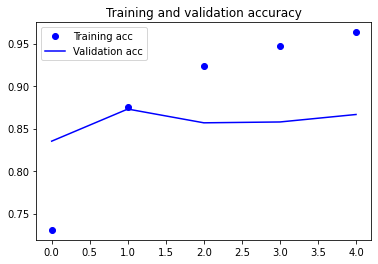

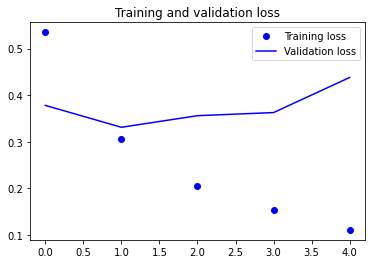

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
scores = model_lstm.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.85944002866745


### GRU
* LSTMと同様に、RNNの一種のニューラルネットワークです。
* LSTMよりもパラメータ数を少なくし、計算コストを抑えたモデルになっています。

#### 確認例題
* GRUモデルは、次のように構築できます。同様にIMDBデータセットを学習させて、ポジ・ネガの分類精度の評価をしてみましょう。
* さらに、一次元CNN、SimpleRNN、LSTM、GRUの4つのモデルについて、分類精度を比較し、考察してみましょう。


In [24]:
from keras.layers import GRU
embedding_dim=128
model_gru=Sequential()
model_gru.add(Embedding(max_words, embedding_dim, input_length=max_len))
model_gru.add(GRU(100))
model_gru.add(Dense(1, activation='sigmoid'))
print(model_gru.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
gru (GRU)                    (None, 100)               69000     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,349,101
Trainable params: 1,349,101
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model_gru.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['acc'])

batch_size = 128
num_epochs = 5

history = model_gru.fit(x_train, y_train, 
              validation_split=0.2, 
              batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
157/157 [==============================] - 199s 1s/step - loss: 0.5038 - acc: 0.7384 - val_loss: 0.3511 - val_acc: 0.8510
Epoch 2/5
157/157 [==============================] - 201s 1s/step - loss: 0.2650 - acc: 0.8943 - val_loss: 0.3424 - val_acc: 0.8562
Epoch 3/5
157/157 [==============================] - 209s 1s/step - loss: 0.1881 - acc: 0.9289 - val_loss: 0.3168 - val_acc: 0.8652
Epoch 4/5
157/157 [==============================] - 205s 1s/step - loss: 0.1515 - acc: 0.9462 - val_loss: 0.4041 - val_acc: 0.8634
Epoch 5/5
157/157 [==============================] - 201s 1s/step - loss: 0.1409 - acc: 0.9477 - val_loss: 0.3745 - val_acc: 0.8712


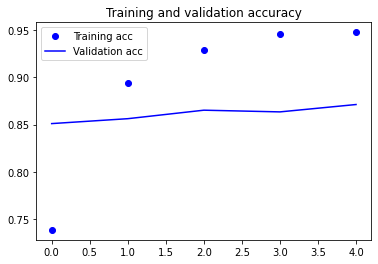

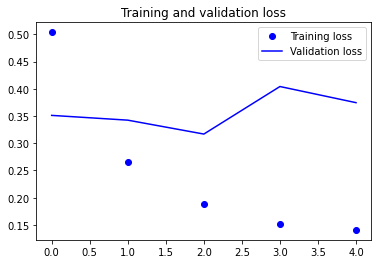

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
scores = model_gru.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8577600121498108


### 言語モデルと文脈
* 単語が文書中に出現する過程を確率過程と見なし、単語がある位置に出現する確率を計算するモデルを言語モデルといいます。また言語モデルにおいて，ある単語の出現確率を計算する際に用いる周囲の単語を文脈といいます。

### 言語モデルとしてのLSTM
* LSTMを学習させることにより、言語モデルを構築することができます。
* 単語の列を文脈として、次の単語を予測します。
* 応用すると、文書を生成することができます。

<br>
<img src='https://drive.google.com/uc?export=view&id=1HJZfDr6x4crlpaUKbWJ1RKi94aeNzBqg' width='60%'>

### LSTMによる文書生成
* Reutersニュースのデータセットをコーパスとして学習したモデルを用いて、文書生成をします。

In [ ]:
# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

# set seeds for reproducability
from tensorflow import set_random_seed
from numpy.random import seed
set_random_seed(2)
seed(1)

import pandas as pd
import numpy as np
import string, os 

In [ ]:
curr_dir = '../input/'
all_headlines = []
for filename in os.listdir(curr_dir):
    if 'Articles' in filename:
        article_df = pd.read_csv(curr_dir + filename)
        all_headlines.extend(list(article_df.headline.values))
        break

all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [clean_text(x) for x in all_headlines]
corpus[:10]

In [ ]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[:10]

In [ ]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [ ]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

In [ ]:
model.fit(predictors, label, epochs=100, verbose=5)

In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

#### 確認例題
* IMDBデータセットをコーパスとして学習したモデルを構築し、そのモデルを用いて文書生成をしてみましょう。

### 参考文献
* https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms